<a href="https://colab.research.google.com/github/AshwinMahajan710/Deep-Learning-Practice-Projects/blob/main/Batch_vs_stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Necessary Imports
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# Feature seperation
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
# Standard scaling so model will coverge better
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled.shape

(400, 2)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.shape

(320, 2)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
# As batch size 320 it is batch gd
# If we change batch size then it will take more time as it becomes sgd
history = model.fit(X_scaled,y,epochs=10,batch_size=320)
print(time.time() - start)

Epoch 1/10
2/2 [==============================] - 1s 11ms/step - loss: 0.7339 - accuracy: 0.4200
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 0.7204 - accuracy: 0.4325
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 0.7122 - accuracy: 0.4875
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 0.7054 - accuracy: 0.5475
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6992 - accuracy: 0.6025
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6935 - accuracy: 0.6475
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6881 - accuracy: 0.6825
Epoch 8/10
2/2 [==============================] - 0s 9ms/step - loss: 0.6830 - accuracy: 0.6975
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6780 - accuracy: 0.6925
Epoch 10/10
2/2 [==============================] - 0s 12ms/step - loss: 0.6731 - accuracy: 0.6925
1.333946704864502


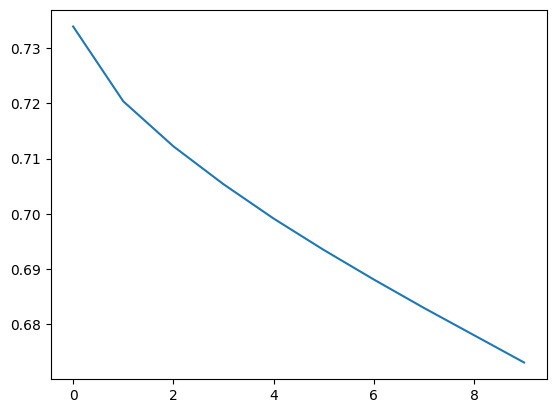

In [14]:
# Decreaing loss we can see here
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [15]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 [==============================] - 1s 346ms/step - loss: 0.7045 - accuracy: 0.6031 - val_loss: 0.7756 - val_accuracy: 0.3625
Epoch 2/10
2/2 [==============================] - 0s 79ms/step - loss: 0.6966 - accuracy: 0.6687 - val_loss: 0.7700 - val_accuracy: 0.3625
Epoch 3/10
2/2 [==============================] - 0s 65ms/step - loss: 0.6910 - accuracy: 0.7156 - val_loss: 0.7680 - val_accuracy: 0.3750
Epoch 4/10
2/2 [==============================] - 0s 63ms/step - loss: 0.6861 - accuracy: 0.7156 - val_loss: 0.7633 - val_accuracy: 0.3875
Epoch 5/10
2/2 [==============================] - 0s 71ms/step - loss: 0.6812 - accuracy: 0.7156 - val_loss: 0.7601 - val_accuracy: 0.4000
Epoch 6/10
2/2 [==============================] - 0s 68ms/step - loss: 0.6769 - accuracy: 0.7188 - val_loss: 0.7563 - val_accuracy: 0.4000
Epoch 7/10
2/2 [==============================] - 0s 60ms/step - loss: 0.6728 - accuracy: 0.7188 - val_loss: 0.7538 - val_accuracy: 0.4000
Epoch 8/10
2/2 [==========

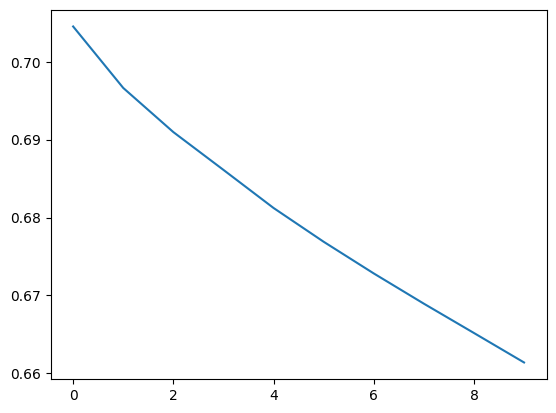

In [17]:
plt.plot(history.history['loss'])